In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
from plot_params import *
basedir= Path('/home/hsher/scratch/ABC_2rep')
out_stem = 'K562_rep4'
out_stem2 = 'K562_rep6'
data = pd.read_csv(basedir /f'counts/genome/megatables/{out_stem}.tsv.gz', sep = '\t')
data2 = pd.read_csv(basedir /f'counts/genome/megatables/{out_stem2}.tsv.gz', sep = '\t')

ground_truth = pd.read_csv('Dan_multiplex1_K562_rep4.Dan_multiplex1_K562_rep6.reproducible_window.csv',
                          index_col = 0)
ground_truth_skipper = pd.read_csv('ABC_K562.skipper_reproducible_window.csv',
                          index_col = 0)

clusters = pd.read_csv(basedir /f'DMM/{out_stem}.megaoutputs.tsv', sep = '\t', index_col = 0)

In [2]:
anno = pd.read_csv(basedir /f'DMM/{out_stem}.cluster_summary.csv', index_col = 0)

In [3]:
ground_truth_skipper.rename({'DDX3X': 'DDX3'}, axis = 1, inplace = True)

In [4]:
data = data.loc[data.sum(axis = 1)>10]
data2 = data2.loc[data2.sum(axis = 1)>10]

In [5]:
single_assignment = ground_truth.loc[ground_truth.sum(axis = 1)==1]
category = pd.from_dummies(single_assignment)
category.index = single_assignment.index

In [6]:
single_assignment = ground_truth_skipper.loc[ground_truth_skipper.sum(axis = 1)==1]
category_eclip = pd.from_dummies(single_assignment)
category_eclip.index = single_assignment.index

In [7]:
data_norm = data.div(data.sum(axis = 1), axis = 0)
data2_norm = data.div(data.sum(axis = 1), axis = 0)

In [8]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
X = data_norm
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)
X_transformed = pd.DataFrame(X_transformed, index = data.index, columns = ['pca1','pca2'])
#X_transformed = X_transformed.merge(ground_truth_skipper, left_index = True, right_index = True, how = 'left')
X_transformed['eCLIP']=category_eclip
X_transformed['ABC(CLIPper+CC)']=category

In [9]:
anno['RBP'].dropna().unique()

array(['IGF2BP2,FAM120A', 'IGF2BP2', 'RBFOX2,PRPF8', 'RBFOX2',
       'RBFOX2,FAM120A', 'PUM2', 'PUM2,EIF3G,LIN28B', 'FAM120A,ZC3H11A',
       'FAM120A', 'FAM120A,PRPF8', 'FAM120A,LIN28B', 'DDX3,EIF3G', 'DDX3',
       'PRPF8', 'PRPF8,SF3B4', 'PRPF8,LIN28B', 'LIN28B', 'SF3B4'],
      dtype=object)

In [10]:
color_dict = dict(zip(X_transformed['eCLIP'].dropna().unique(),
                     ['pink', 'tomato', 'peachpuff', 'gold', 'lightgreen',
                      'seagreen', 'lightskyblue', 'royalblue', 'orchid', 'slateblue']
                     
                     )
                 )

In [11]:
color_dict

{'ZC3H11A': 'pink',
 'PRPF8': 'tomato',
 'SF3B4': 'peachpuff',
 'FAM120A': 'gold',
 'LIN28B': 'lightgreen',
 'RBFOX2': 'seagreen',
 'PUM2': 'lightskyblue',
 'IGF2BP2': 'royalblue',
 'DDX3': 'orchid',
 'EIF3G': 'slateblue'}

In [12]:
color_dict['DDX3,EIF3G'] = 'purple'
color_dict['RBFOX2,FAM120A'] = 'green'
color_dict['PRPF8,LIN28B']='grey'
color_dict['RBFOX2,PRPF8']='black'
color_dict['FAM120A,PRPF8']='orange'
color_dict['PRPF8,SF3B4'] = 'coral'
color_dict['IGF2BP2,FAM120A']='olive'
color_dict['FAM120A,LIN28B']='yellow'

/home/hsher/miniconda3/envs/Metadensity/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/hsher/miniconda3/envs/Metadensity/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


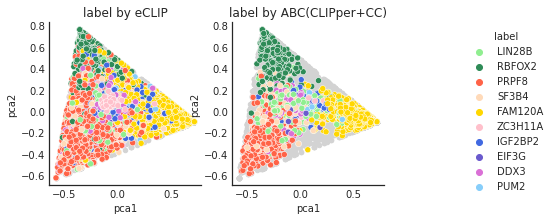

In [13]:
f, ax = plt.subplots(1,2, figsize = (6,3))
X_transformed.sort_values(by = 'eCLIP')
col = 'eCLIP'
X_transformed.loc[X_transformed[col].isnull()].plot.scatter('pca1', 'pca2', ax = ax[0], color = 'lightgrey')
sns.scatterplot('pca1', 'pca2', data=X_transformed, hue=col, ax = ax[0], palette = color_dict, legend = False)
#ax[0].legend(bbox_to_anchor = (1.5, 1), title = f'label by {col}')
ax[0].set_title(f'label by {col}')
sns.despine()

col = 'ABC(CLIPper+CC)'
X_transformed.loc[X_transformed[col].isnull()].plot.scatter('pca1', 'pca2', ax = ax[1], color = 'lightgrey')
sns.scatterplot('pca1', 'pca2', data=X_transformed, hue=col, ax = ax[1], palette = color_dict)
ax[1].legend(bbox_to_anchor = (1.5, 1), title = f'label')
ax[1].set_title(f'label by {col}')
sns.despine()
plt.savefig(figdir/'PCA_plots.pdf')
 

In [14]:
import numpy as np
from sklearn.manifold import TSNE


In [15]:
clusters.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,logLR:K562_rep4.IGF2BP2,logLR:K562_rep4.RBFOX2,logLR:K562_rep4.PUM2,logLR:K562_rep4.FAM120A,logLR:K562_rep4.DDX3,logLR:K562_rep4.ZC3H11A,logLR:K562_rep4.EIF3G,logLR:K562_rep4.PRPF8,logLR:K562_rep4.LIN28B,logLR:K562_rep4.SF3B4
Row.names,,,,,,,,,,,,,,,,,,,,,
1,6.197216e-35,2.199478e-36,3.492389e-11,5.569905e-14,0.000047,1.644388e-08,9.501648e-08,0.000181,5.441566e-22,8.433227e-15,...,-7.292894,-0.942329,1.829321,-3.383087,-1.475891,1.436128,-3.338623,-1.527954,0.425613,-17.252205
10,3.603698e-11,9.503707e-11,1.381776e-02,9.972977e-03,0.154184,3.910480e-02,6.159416e-03,0.010367,3.910959e-08,9.092160e-11,...,-1.235579,-0.751955,1.101603,-2.756792,-0.749571,-2.546971,0.143001,0.660570,-0.784458,-2.576009
1001139,8.779567e-18,2.000750e-17,2.475115e-03,1.032120e-03,0.098396,8.341701e-03,1.398264e-03,0.001757,1.319000e-12,4.221839e-13,...,-2.315728,-0.298936,1.598095,-4.288169,1.002582,-3.710389,-0.884093,0.601711,-0.886836,-5.853674
1001252,4.020593e-02,8.095106e-02,1.598336e-04,2.530725e-05,0.001119,1.023597e-03,2.145944e-04,0.047868,1.829011e-01,1.485665e-02,...,-0.005695,-0.161900,-0.299946,3.088969,-2.317580,-2.585112,-0.974713,-2.610769,-1.274540,-2.423228
1001255,1.291650e-03,5.346854e-03,5.456643e-03,1.073879e-03,0.021083,1.696604e-02,5.696138e-03,0.129921,4.776403e-02,5.492691e-04,...,1.247929,-0.161900,-0.299946,0.521954,-2.317580,-2.585112,-0.974713,-0.769233,-1.274540,-2.423228


In [16]:

X = data_norm.sample(5000)
X_embedded = TSNE(n_components=2, init='random', perplexity=30).fit_transform(X)
X_embedded = pd.DataFrame(X_embedded, index = X.index, columns = ['t-SNE1', 't-SNE2'])
X_embedded['ABC(CLIPper+CC)']=category
X_embedded['eCLIP']=category_eclip

/home/hsher/miniconda3/envs/Metadensity/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [17]:
clusters['anno']=clusters['BF_assignment'].map(anno['RBP'])
X_embedded['solitary_cluster']=clusters.loc[~clusters['anno'].fillna('').str.contains(','), 'anno']
X_embedded['combinatorial_cluster']=clusters.loc[clusters['anno'].fillna('').str.contains(','), 'anno']

/home/hsher/miniconda3/envs/Metadensity/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/hsher/miniconda3/envs/Metadensity/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/hsher/miniconda3/envs/Metadensity/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

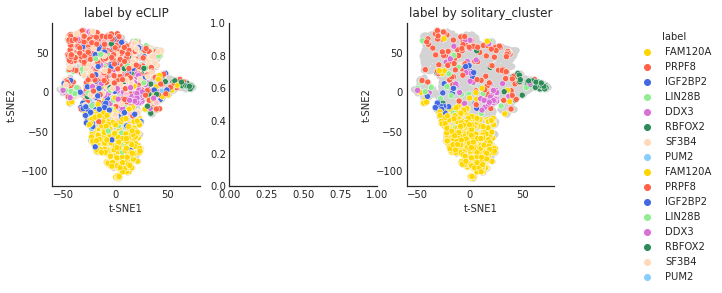

In [18]:
f, ax = plt.subplots(1,3, figsize = (9,3))
X_transformed.sort_values(by = 'eCLIP')
col = 'eCLIP'
X_embedded.loc[X_embedded[col].isnull()].plot.scatter('t-SNE1', 't-SNE2', ax = ax[0], color = 'lightgrey')
sns.scatterplot('t-SNE1', 't-SNE2', data=X_embedded, hue=col, ax = ax[0], palette = color_dict, legend = False)
#ax[0].legend(bbox_to_anchor = (1.5, 1), title = f'label by {col}')
ax[0].set_title(f'label by {col}')
sns.despine()

# col = 'ABC(CLIPper+CC)'
# X_embedded.loc[X_embedded[col].isnull()].plot.scatter('t-SNE1', 't-SNE2', ax = ax[1], color = 'lightgrey')
# sns.scatterplot('t-SNE1', 't-SNE2', data=X_embedded, hue=col, ax = ax[1], palette = color_dict)
# ax[1].legend(bbox_to_anchor = (1.5, 1), title = f'label')
# ax[1].set_title(f'label by {col}')
# sns.despine()
# #plt.savefig(figdir/'tSNE_plots.pdf')
 
col = 'solitary_cluster'
X_embedded.loc[X_embedded[col].isnull()].plot.scatter('t-SNE1', 't-SNE2', ax = ax[2], color = 'lightgrey')
sns.scatterplot('t-SNE1', 't-SNE2', data=X_embedded, hue=col, ax = ax[2], palette = color_dict)
ax[2].legend(bbox_to_anchor = (1.5, 1), title = f'label')
ax[2].set_title(f'label by {col}')
sns.despine()
#plt.savefig(figdir/'tSNE_plots.pdf')

col = 'solitary_cluster'
X_embedded.loc[X_embedded[col].isnull()].plot.scatter('t-SNE1', 't-SNE2', ax = ax[2], color = 'lightgrey')
sns.scatterplot('t-SNE1', 't-SNE2', data=X_embedded, hue=col, ax = ax[2], palette = color_dict)
ax[2].legend(bbox_to_anchor = (1.5, 1), title = f'label')
ax[2].set_title(f'label by {col}')
sns.despine()
#plt.savefig(figdir/'tSNE_plots.pdf')


/home/hsher/miniconda3/envs/Metadensity/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/hsher/miniconda3/envs/Metadensity/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/hsher/miniconda3/envs/Metadensity/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

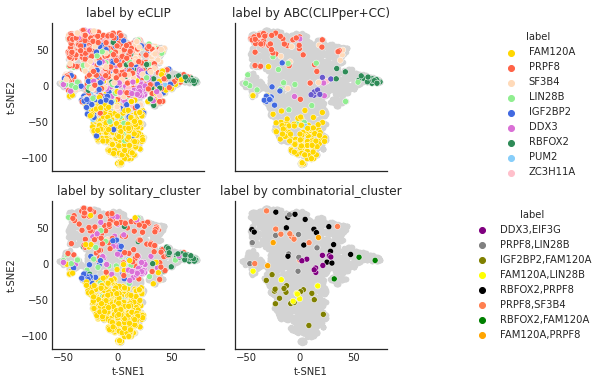

In [19]:
f, ax = plt.subplots(2,2, figsize = (6,6), sharex = True, sharey = True)
ax = ax.flatten()
X_transformed.sort_values(by = 'eCLIP')
col = 'eCLIP'
X_embedded.loc[X_embedded[col].isnull()].plot.scatter('t-SNE1', 't-SNE2', ax = ax[0], color = 'lightgrey')
sns.scatterplot('t-SNE1', 't-SNE2', data=X_embedded, hue=col, ax = ax[0], palette = color_dict, legend = True)
ax[0].legend(bbox_to_anchor = (3.5, 1), title = f'label')
ax[0].set_title(f'label by {col}')
#ax[0].legend(bbox_to_anchor = (1.5, 1), title = f'label')
sns.despine()

col = 'ABC(CLIPper+CC)'
X_embedded.loc[X_embedded[col].isnull()].plot.scatter('t-SNE1', 't-SNE2', ax = ax[1], color = 'lightgrey')
sns.scatterplot('t-SNE1', 't-SNE2', data=X_embedded, hue=col, ax = ax[1], palette = color_dict, legend = False)
#ax[1].legend(bbox_to_anchor = (1.5, 1), title = f'label')
ax[1].set_title(f'label by {col}')
sns.despine()

 
col = 'solitary_cluster'
X_embedded.loc[X_embedded[col].isnull()].plot.scatter('t-SNE1', 't-SNE2', ax = ax[2], color = 'lightgrey')
sns.scatterplot('t-SNE1', 't-SNE2', data=X_embedded, hue=col, ax = ax[2], palette = color_dict, legend = False)
ax[2].set_title(f'label by {col}')
sns.despine()


col = 'combinatorial_cluster'
X_embedded.loc[X_embedded[col].isnull()].plot.scatter('t-SNE1', 't-SNE2', ax = ax[3], color = 'lightgrey')
sns.scatterplot('t-SNE1', 't-SNE2', data=X_embedded, hue=col, ax = ax[3], palette = color_dict)
ax[3].legend(bbox_to_anchor = (1.5, 1), title = f'label')
ax[3].set_title(f'label by {col}')
sns.despine()
plt.savefig(figdir/'tSNE_plots.pdf')

# Explore compisitional data properties

In [20]:
ground_truth_skipper

,PRPF8,IGF2BP2,EIF3G,FAM120A,SF3B4,RBFOX2,ZC3H11A,DDX3,PUM2,LIN28B
name,,,,,,,,,,
1,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,True,False,False,False
5,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...
5926993,False,False,False,False,False,False,True,False,False,False
5926994,False,False,False,False,False,False,True,False,False,False
5926995,False,False,False,False,False,False,True,False,False,False


In [21]:
col = 'K562_rep4.LIN28B'
ip = data[col]
cc = data.loc[:,~(data.columns==col)].sum(axis = 1)
summed_data = pd.concat([ip, cc], axis = 1)
summed_data.columns = [col, 'CC']

Text(0, 0.5, 'K562_rep4.LIN28B')

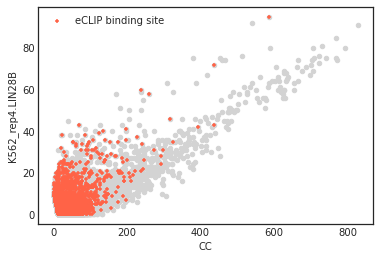

In [22]:
rbp = col.split('.')[1]
f, ax = plt.subplots()
summed_data.plot.scatter(x='CC', y = col, ax = ax, color = 'lightgrey')
summed_data.loc[summed_data.index.isin(
    ground_truth_skipper.loc[ground_truth_skipper[rbp]].index
)].plot.scatter(x='CC', y = col, color = 'tomato', ax = ax, marker = '+', label = 'eCLIP binding site')
plt.xlabel('CC')
plt.ylabel(col)

In [23]:
eclip_data = pd.read_csv(
    f'/projects/ps-yeolab3/eboyle/encode/pipeline/05_20220720/20220728_encode3/k562/output/counts/genome/tables/{rbp}_K562.tsv.gz',
    sep = '\t'
)

<AxesSubplot: xlabel='LIN28B_IN_1', ylabel='LIN28B_IP_1'>

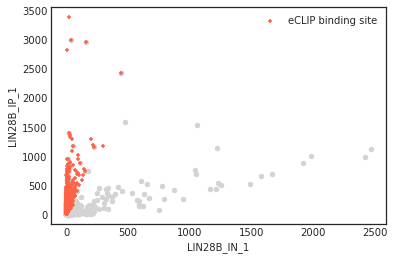

In [24]:
f, ax = plt.subplots()
eclip_data = eclip_data.loc[eclip_data[[f'{rbp}_IN_1',f'{rbp}_IP_1']].sum(axis = 1)>10]
eclip_data.sample(10000).plot.scatter(x=f'{rbp}_IN_1', y = f'{rbp}_IP_1', ax = ax, color = 'lightgrey')
eclip_data.loc[eclip_data['name'].isin(
    ground_truth_skipper.loc[ground_truth_skipper[rbp]].index
)].plot.scatter(x=f'{rbp}_IN_1', y = f'{rbp}_IP_1', color = 'tomato', ax = ax,
                marker = '+', label = 'eCLIP binding site')

Text(0.5, 1.0, 'ABC libraries')

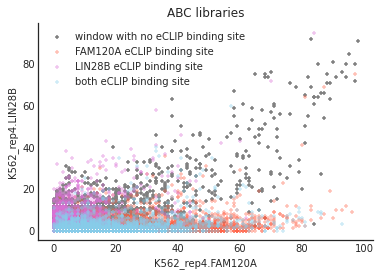

In [25]:

f, ax = plt.subplots()
rbp1 = 'FAM120A'
rbp2 = 'LIN28B'
#data.sample(5000).plot.scatter(x = f'K562_rep4.{rbp1}', y = f'K562_rep4.{rbp2}', figsize = (3,3), ax = ax)
sns.despine()

data.loc[~data.index.isin(ground_truth_skipper.index)].plot.scatter(
    x = f'K562_rep4.{rbp1}', y = f'K562_rep4.{rbp2}', ax = ax,
label = 'window with no eCLIP binding site', color = 'grey', marker = '+')
data.loc[data.index.isin(
    ground_truth_skipper.loc[(ground_truth_skipper[rbp1])&(~ground_truth_skipper[rbp2])].index
)].plot.scatter(x = f'K562_rep4.{rbp1}', y = f'K562_rep4.{rbp2}', 
                color = 'tomato', ax = ax, marker = '+', label = f'{rbp1} eCLIP binding site',
               alpha = 0.4)

data.loc[data.index.isin(
    ground_truth_skipper.loc[(~ground_truth_skipper[rbp1])&(ground_truth_skipper[rbp2])].index
)].plot.scatter(x = f'K562_rep4.{rbp1}', y = f'K562_rep4.{rbp2}', color = 'orchid', ax = ax, marker = '+', label = f'{rbp2} eCLIP binding site',
               alpha = 0.4)

data.loc[data.index.isin(
    ground_truth_skipper.loc[(ground_truth_skipper[rbp1])&(ground_truth_skipper[rbp2])].index
)].plot.scatter(x = f'K562_rep4.{rbp1}', y = f'K562_rep4.{rbp2}', color = 'skyblue', ax = ax, marker = '+', label = f'both eCLIP binding site',
               alpha = 0.4)


sns.despine()
plt.title('ABC libraries')

In [26]:
eclip_data1 = pd.read_csv(
    f'/projects/ps-yeolab3/eboyle/encode/pipeline/05_20220720/20220728_encode3/k562/output/counts/genome/tables/{rbp1}_K562.tsv.gz',
    sep = '\t'
)
eclip_data2 = pd.read_csv(
    f'/projects/ps-yeolab3/eboyle/encode/pipeline/05_20220720/20220728_encode3/k562/output/counts/genome/tables/{rbp2}_K562.tsv.gz',
    sep = '\t'
)

In [27]:
eclip_data1.columns

Index(['chr', 'start', 'end', 'name', 'score', 'strand', 'gc', 'FAM120A_IN_1',
       'FAM120A_IP_1', 'FAM120A_IP_2'],
      dtype='object')

In [28]:
merge_keys = ['chr', 'start', 'end', 'name', 'score', 'strand', 'gc']

eclip_combined = eclip_data1.merge(eclip_data2, left_on = merge_keys, right_on = merge_keys)
eclip_combined = eclip_combined.loc[eclip_combined[[f'{rbp1}_IP_1', f'{rbp2}_IP_1']].sum(axis = 1)>10]


Text(0.5, 1.0, 'eCLIP IP libraries')

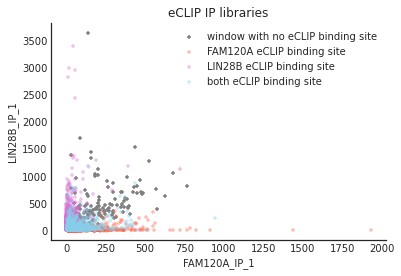

In [29]:
f, ax = plt.subplots()
eclip_combined.loc[~eclip_combined['name'].isin(ground_truth_skipper.index)].plot.scatter(
    x = f'{rbp1}_IP_1', y = f'{rbp2}_IP_1', ax = ax,
label = 'window with no eCLIP binding site', color = 'grey', marker = '+')

eclip_combined.loc[eclip_combined['name'].isin(
    ground_truth_skipper.loc[(ground_truth_skipper[rbp1])&(~ground_truth_skipper[rbp2])].index
)].plot.scatter(x = f'{rbp1}_IP_1', y = f'{rbp2}_IP_1', 
                color = 'tomato', ax = ax, marker = '+', label = f'{rbp1} eCLIP binding site',
               alpha = 0.4)

eclip_combined.loc[eclip_combined['name'].isin(
    ground_truth_skipper.loc[(~ground_truth_skipper[rbp1])&(ground_truth_skipper[rbp2])].index
)].plot.scatter(x = f'{rbp1}_IP_1', y = f'{rbp2}_IP_1', color = 'orchid', ax = ax, marker = '+', label = f'{rbp2} eCLIP binding site',
               alpha = 0.4)

eclip_combined.loc[eclip_combined['name'].isin(
    ground_truth_skipper.loc[(ground_truth_skipper[rbp1])&(ground_truth_skipper[rbp2])].index
)].plot.scatter(x = f'{rbp1}_IP_1', y = f'{rbp2}_IP_1', color = 'skyblue', ax = ax, marker = '+', label = f'both eCLIP binding site',
               alpha = 0.4)
sns.despine()
plt.title('eCLIP IP libraries')

<AxesSubplot: ylabel='Frequency'>

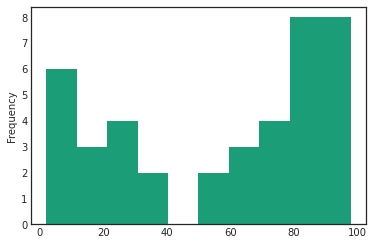

In [30]:
eclip_data1.loc[eclip_data1[[f'{rbp1}_IN_1',f'{rbp1}_IP_1']].sum(axis = 1)==100, f'{rbp1}_IP_1'].plot.hist()

<AxesSubplot: ylabel='Frequency'>

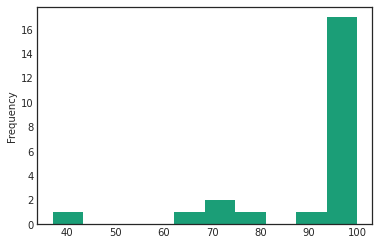

In [31]:
eclip_data2.loc[eclip_data2[[f'{rbp2}_IN_1',f'{rbp2}_IP_1']].sum(axis = 1)==100, f'{rbp2}_IP_1'].plot.hist()

# GC bias

In [32]:
two_rep = pd.concat([data,data2], axis = 1).dropna()


In [33]:
data[f'{out_stem}.{rbp}']

0          21
1          25
2          10
3          11
4           2
           ..
5926992    16
5926993     7
5926994     4
5926995     3
5926996     5
Name: K562_rep4.LIN28B, Length: 82249, dtype: int64

In [34]:
two_reps = pd.concat([data, data2], axis = 1)
two_reps['gc']=eclip_data.set_index('name')['gc']
two_reps['gc_bin']=pd.qcut(two_reps['gc'], q = 10)

In [35]:
two_rep2_sums = two_reps.groupby(by = 'gc_bin').sum()

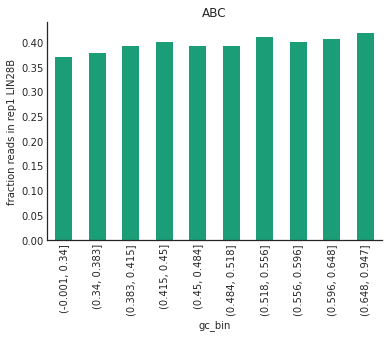

In [36]:
(two_rep2_sums[f'{out_stem}.{rbp}']/(
    two_rep2_sums[f'{out_stem}.{rbp}']+two_rep2_sums[f'{out_stem2}.{rbp}'])).plot.bar()
plt.ylabel(f'fraction reads in rep1 {rbp2}')
plt.title('ABC')
sns.despine()

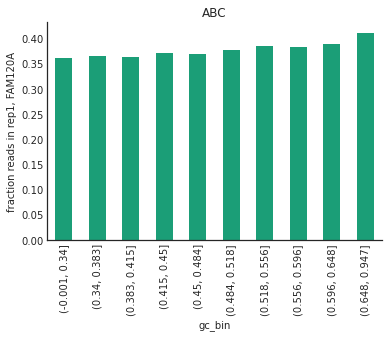

In [37]:
(two_rep2_sums[f'{out_stem}.{rbp1}']/(
    two_rep2_sums[f'{out_stem}.{rbp1}']+two_rep2_sums[f'{out_stem2}.{rbp1}'])).plot.bar()
plt.ylabel(f'fraction reads in rep1, {rbp1}')
plt.title('ABC')
sns.despine()

/scratch/hsher/33893438.tscc-mgr7.local/ipykernel_31097/2349643193.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_gcbin_eclip = eclip_data.groupby(by = 'gc_bin').sum()[[f'{rbp}_IP_2',f'{rbp}_IP_1']]


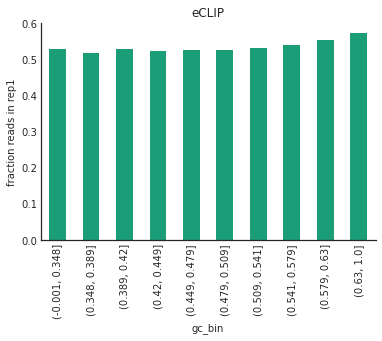

In [38]:
eclip_data['gc_bin']=pd.qcut(eclip_data['gc'], q = 10)
by_gcbin_eclip = eclip_data.groupby(by = 'gc_bin').sum()[[f'{rbp}_IP_2',f'{rbp}_IP_1']]
by_gcbin_eclip.div(by_gcbin_eclip.sum(axis = 1), axis = 0)[f'{rbp}_IP_1'].plot.bar()
plt.ylabel('fraction reads in rep1')
plt.title('eCLIP')
sns.despine()